In [113]:
# importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [114]:
# loading the dataset
tree_data = pd.read_csv('A1_TreeDB.csv')
print("Shape of the dataset: ", tree_data.shape)
print("Number of examples: ", tree_data.shape[0])
print("Number of features: ", tree_data.shape[1])

Shape of the dataset:  (258, 30)
Number of examples:  258
Number of features:  30


In [115]:
# selecting the 4 features from the dataset
tree_data = tree_data[['Height', 'Width', 'Surface Area (m2)', 'Salt']]

In [116]:
# getting description of the data - total number of rows, each attribute's type and number of non-null values
print("Description of the data:")
print(tree_data.info())
print()

Description of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Height             258 non-null    int64 
 1   Width              258 non-null    int64 
 2   Surface Area (m2)  258 non-null    int64 
 3   Salt               258 non-null    object
dtypes: int64(3), object(1)
memory usage: 8.2+ KB
None



In [117]:
# getting unique values of categorical attribute 'Salt'
print("Unique values of categorical attribute Salt: ", tree_data['Salt'].unique())
print()

Unique values of categorical attribute Salt:  ['High' 'Moderate' 'Low']



In [118]:
# getting descriptive statistics of selected attributes
print("Summary of descriptive statistics:")
print(tree_data.describe(include='all'))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Summary of descriptive statistics:
            Height       Width  Surface Area (m2) Salt
count   258.000000  258.000000         258.000000  258
unique         NaN         NaN                NaN    3
top            NaN         NaN                NaN  Low
freq           NaN         NaN                NaN  112
mean     12.313953    7.182171          55.003876  NaN
std       8.279074    4.233661          73.669601  NaN
min       2.000000    2.000000           3.000000  NaN
25%       7.000000    4.000000          13.000000  NaN
50%      10.000000    6.000000          28.000000  NaN
75%      15.000000   10.000000          78.000000  NaN
max      60.000000   25.000000         490.000000  NaN
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [119]:
# converting categorical data 'Salt' to numeric data using Ordinal Encoding
# value 0 represents 'Low', value 1 represents 'Moderate', value 2 represents 'High'
salt_dict = {'Low' : 0, 'Moderate' : 1, 'High' : 2}
tree_data['Salt_encoded'] = tree_data.Salt.map(salt_dict)

In [120]:
print(tree_data.head())

   Height  Width  Surface Area (m2)      Salt  Salt_encoded
0       6      4                 13      High             2
1      10      6                 28  Moderate             1
2       6      4                 13  Moderate             1
3       4      3                  7  Moderate             1
4      20     10                 78  Moderate             1


In [121]:
tree_data_encoded = tree_data.drop(['Salt'], axis=1)

In [122]:
print(tree_data_encoded.head())

   Height  Width  Surface Area (m2)  Salt_encoded
0       6      4                 13             2
1      10      6                 28             1
2       6      4                 13             1
3       4      3                  7             1
4      20     10                 78             1


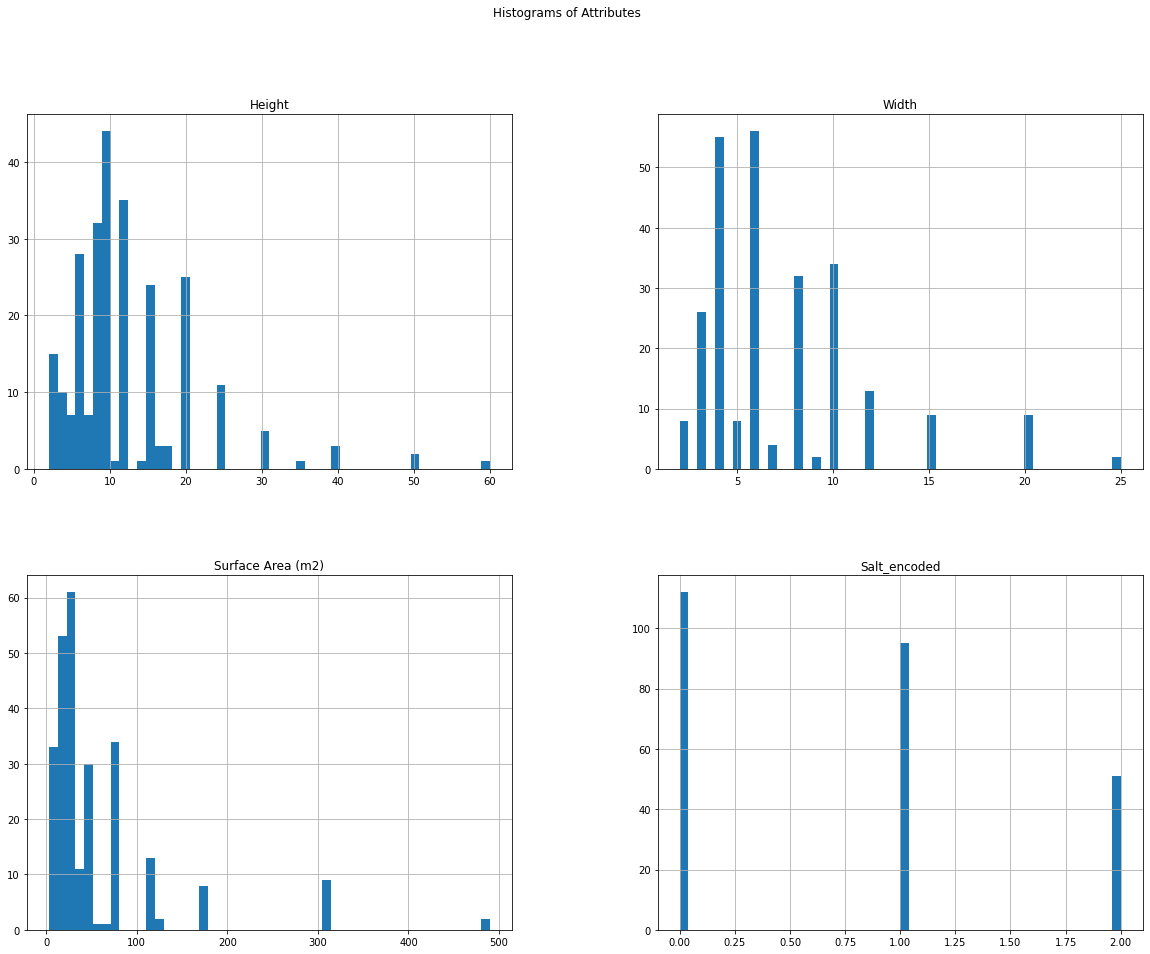

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [123]:
# plotting histograms to check for outliers
tree_data_encoded.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histograms of Attributes")
plt.show()
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

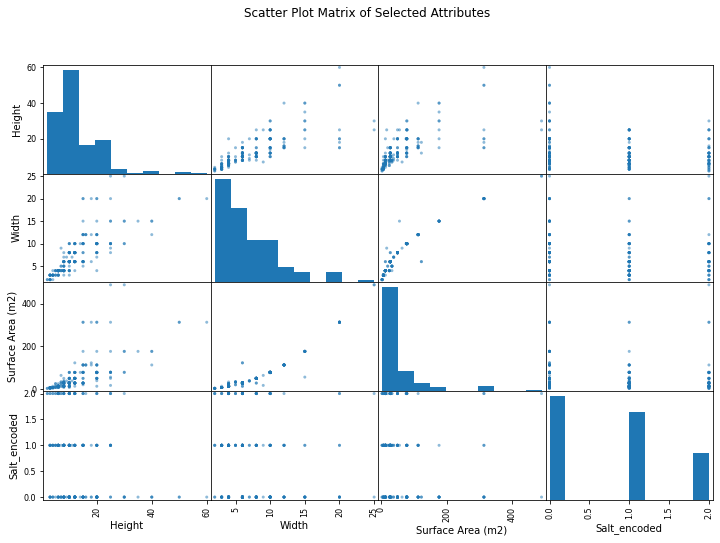

In [124]:
# plotting the scatterplot matrix of selected attributes to visualize pairwise relationships among attributes
attributes = ['Height', 'Width', 'Surface Area (m2)', 'Salt_encoded']
scatter_matrix(tree_data_encoded[attributes], figsize=(12, 8))
plt.suptitle("Scatter Plot Matrix of Selected Attributes")
plt.show()

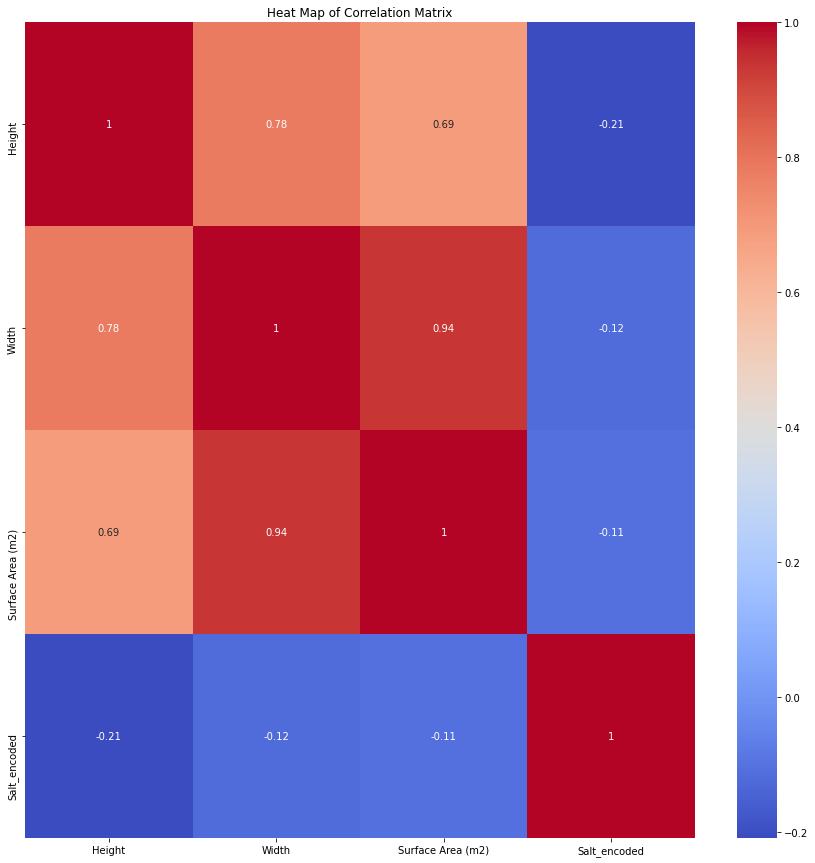

In [125]:
# plotting the correlation matrix heatmap of selected attributes to visualise the pairwise correlation among attributes
corr_matrix = tree_data_encoded.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm").set_title('Heat Map of Correlation Matrix')
plt.show()

In [126]:
# data preparation for cluster analysis

# removing attribute 'Surface Area' as it is highly correlated to 'Width' with a correlation coeff 0.94
tree_data_encoded = tree_data_encoded.drop(['Surface Area (m2)'], axis=1)

In [127]:
print(tree_data_encoded.head())

   Height  Width  Salt_encoded
0       6      4             2
1      10      6             1
2       6      4             1
3       4      3             1
4      20     10             1


In [128]:
# normalizing Height and Width as range of values of these attributes are quite different
ct = ColumnTransformer([('normalize', StandardScaler(), ['Height', 'Width'])], remainder='passthrough')
tree_data_prepared = ct.fit_transform(tree_data_encoded)

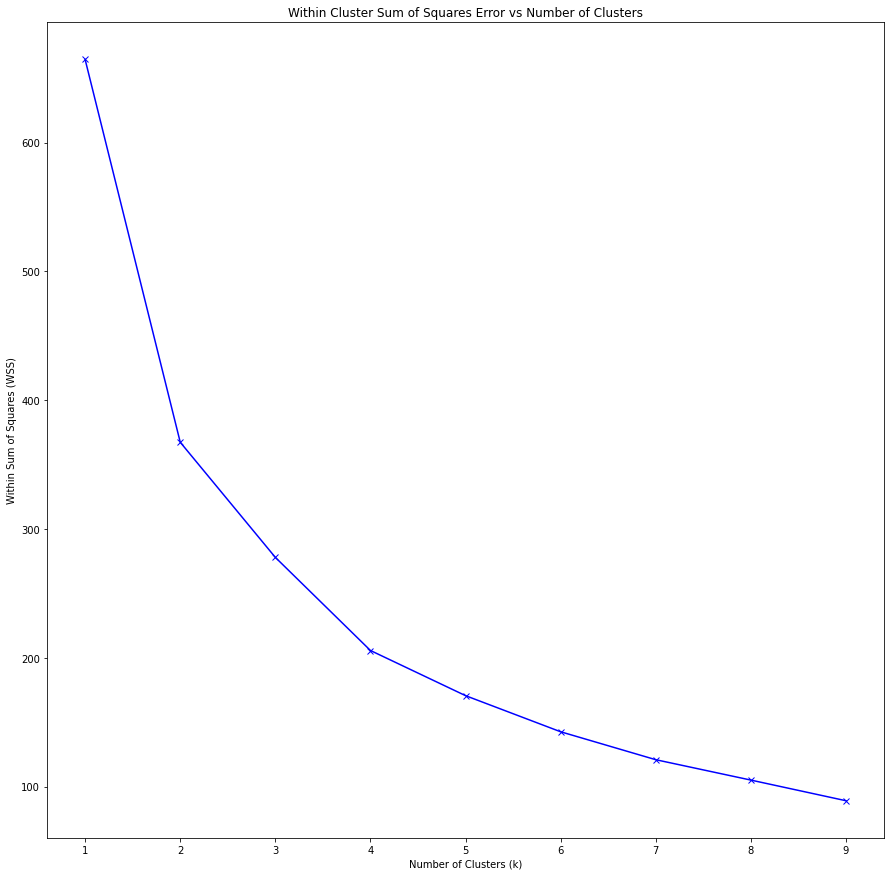

In [129]:
# determining the appropriate number of clusters for K-means clustering analysis
dis = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tree_data_prepared)
    dis.append(kmeanModel.inertia_)

plt.figure(figsize=(15, 15))
plt.plot(K, dis, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Sum of Squares (WSS)')
plt.title('Within Cluster Sum of Squares Error vs Number of Clusters')
plt.show()

In [130]:
# performing K-means clustering analysis
kmeans = KMeans(n_clusters=4, random_state=0).fit(tree_data_prepared)
y_clusters = kmeans.predict(tree_data_prepared)


In [131]:
print("Number of datapoints in each cluster: ", np.bincount(y_clusters))


Number of datapoints in each cluster:  [114  19  49  76]


In [132]:
print("Centroids of each cluster: ")
print(kmeans.cluster_centers_)


Centroids of each cluster: 
[[-5.12525582e-01 -5.16435309e-01  1.35964912e+00]
 [ 2.28688619e+00  2.62244083e+00  4.73684211e-01]
 [ 8.41261136e-01  7.53807974e-01  6.73469388e-01]
 [-3.45325221e-01 -3.66965017e-01  1.22124533e-15]]


In [133]:
print("Cluster of each datapoint: ")
print(kmeans.labels_)

Cluster of each datapoint: 
[0 0 0 0 2 0 3 2 0 3 0 0 0 0 0 2 2 2 2 2 0 3 0 0 3 0 0 3 3 0 0 3 2 3 3 3 0
 3 3 0 0 0 0 0 0 0 0 0 0 3 2 3 0 3 2 1 2 2 3 0 0 3 3 0 0 3 0 3 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 2 2 2 2 0 0 3 3 0 0 2 3 2 3 3 3 3 2 0 3 0 0 0 3 2 2 1 2 1
 1 1 1 1 1 2 1 1 2 3 0 0 1 1 0 1 0 0 2 1 2 3 2 1 2 3 3 3 3 0 0 2 3 3 0 3 3
 0 0 3 3 3 0 0 0 0 0 3 0 0 0 0 0 0 2 0 2 3 3 3 0 0 3 3 3 3 1 0 0 3 3 3 3 3
 0 0 0 0 0 2 2 0 0 3 3 0 2 0 0 3 2 0 0 0 2 2 0 0 3 3 3 3 0 2 0 0 2 0 3 0 3
 2 2 3 3 3 2 2 0 0 3 1 0 0 0 0 0 0 2 3 2 0 0 1 3 3 2 0 0 1 3 3 3 0 2 3 3]


In [134]:
# plotting the clusters in 2-dimensional space
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(tree_data_prepared)

In [135]:
unique_labels = np.unique(kmeans.labels_)
centroids = kmeans.cluster_centers_

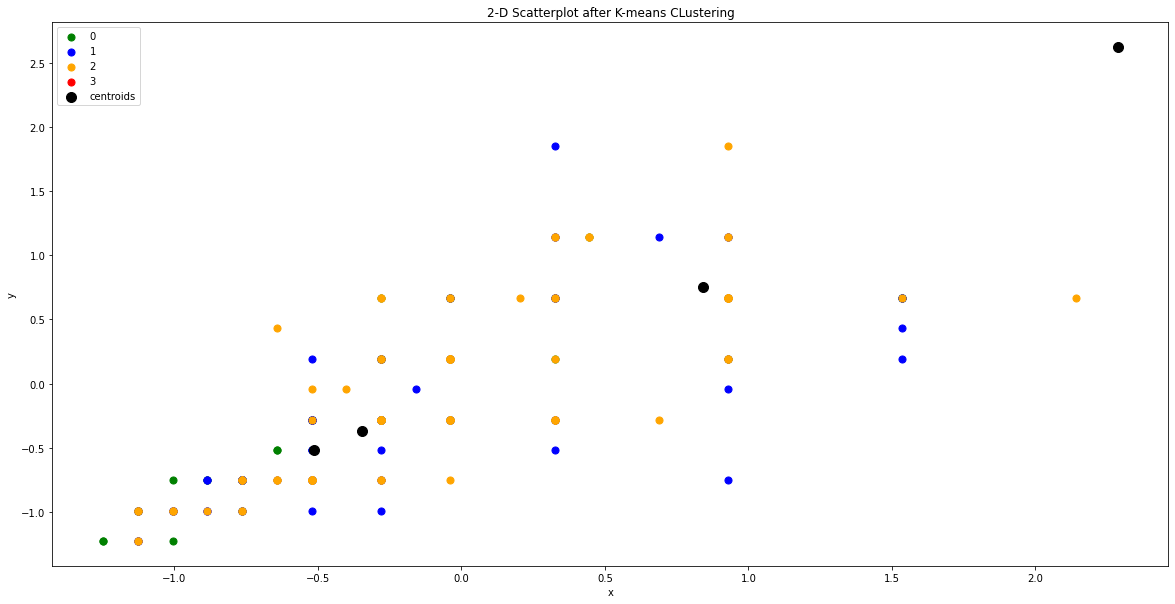

In [146]:
x = tree_data_prepared

plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "0")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "1")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'orange', label = "2")
plt.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],s = 50, c = 'red', label = "3")
# plt.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],s = 50, c = 'pink', label = "Less income and less spending")

plt.scatter(centroids[:,0], centroids[:,1], s = 100, c = "black", label = "centroids")
plt.xlabel("x")
plt.ylabel("y")
plt.title('2-D Scatterplot after K-means CLustering')
plt.legend()
plt.show()

In [137]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

-0.2800374605772598
-0.27977401281550873
1.0


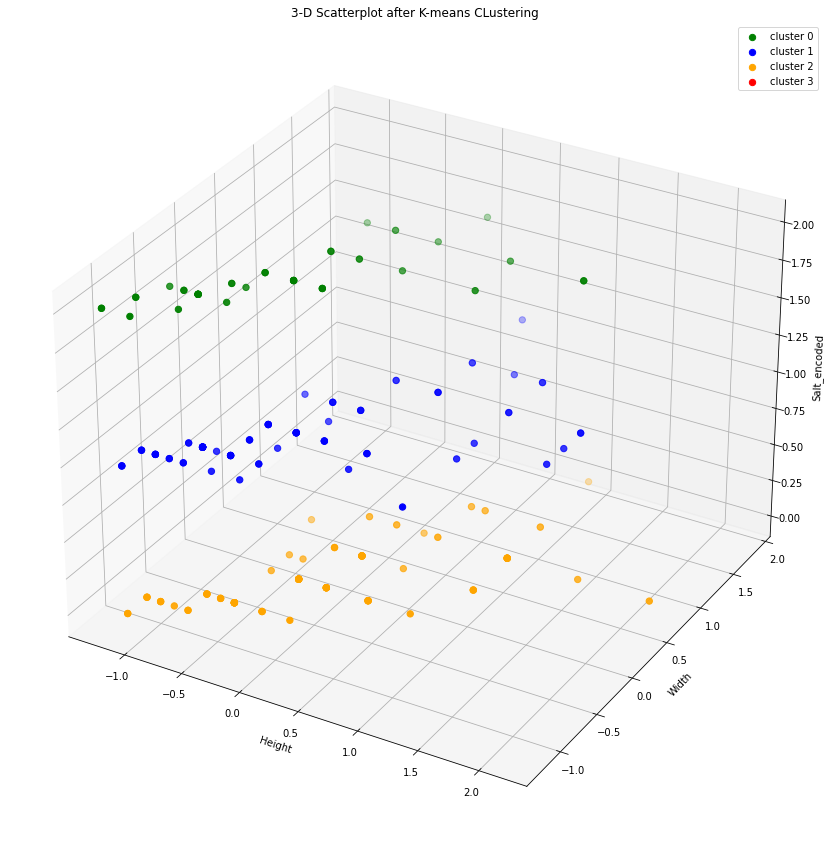

In [145]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'green', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = 'red', label = "cluster 3")
# ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Salt_encoded')
plt.title('3-D Scatterplot after K-means CLustering')
ax.legend()
plt.show()

In [139]:
# plotting K-distance graph determining the appropriate value of epsilon for DBScan clustering analysis
min_samples = tree_data_prepared.shape[1]*2
k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors=k).fit(tree_data_prepared)
dist, indices = nbrs.kneighbors(tree_data_prepared)
dist = np.sort(dist, axis=0)
dist = dist[:, 1]

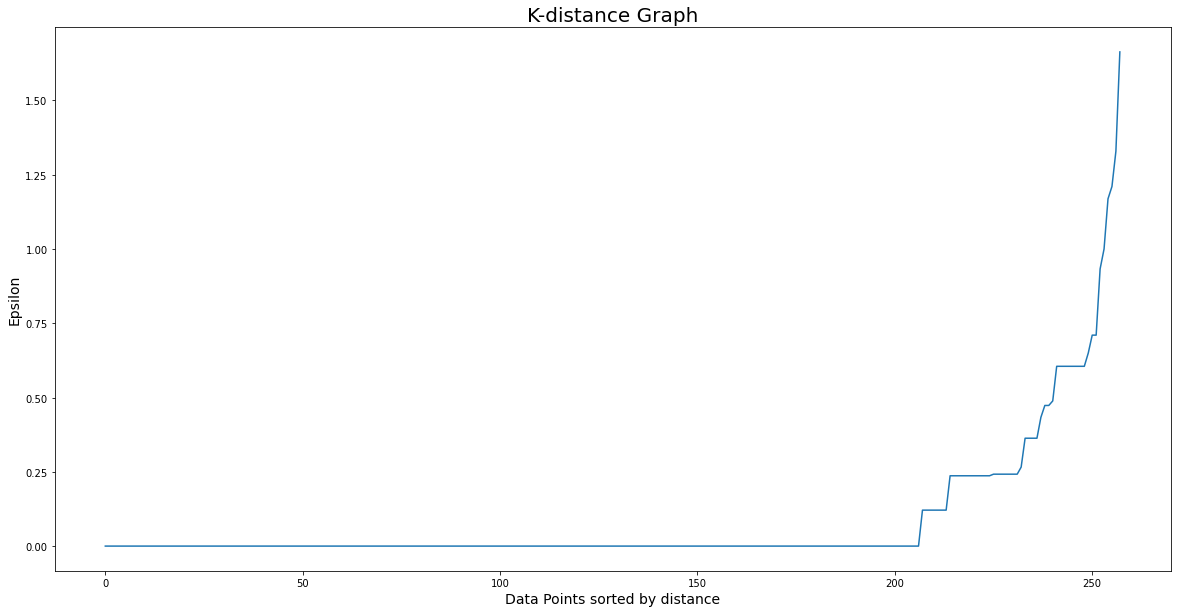

In [140]:
plt.figure(figsize=(20, 10))
plt.plot(dist)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [141]:
# performing DBScan clustering analysis
db_scan = DBSCAN(eps=0.75, min_samples=min_samples)
y_clusters = db_scan.fit_predict(tree_data_prepared)

print("Cluster of each datapoint: ")
print(y_clusters)
print()

Cluster of each datapoint: 
[ 0  1  1  1  1  1  2  0  0  2  0  0  0  0  0  1  0 -1  0  1  1  2  1  1
  2  0  1  2  2  1  1  2  2  2  2  2  1  2  2  0  0  0  0  1  1  1  0  0
  0  2  2  2  0  2  2 -1  0  2  2  0  0  2  2  1  0  2  1  2  0  0  2  1
  1  1  1  1  1  1  1  1  1  1  1  1  2  2  0  1  2  2  0  0  1  2  2  2
  2  2  2  2  1  2  1  1  1  2  2  2 -1  2 -1 -1 -1 -1 -1 -1  1 -1 -1  2
  2  1  1 -1 -1  1 -1  0  1  0 -1  2  2  2 -1  2  2  2  2  2  1  1  2  2
  2  0  2  2  0  0  2  2  2  1  1  1  1  1  2  1  1  1  1  1  0  1  1  1
  2  2  2  1  1  2  2  2  2 -1  1  1  2  2  2  2  2  1  0  0  0  0  1  1
  0  0  2  2  1  0  1  1  2  1  1  0  1  2  2  0  1  2  2  2  2  1  1  1
  1  1  1  2  1  2  1  1  2  2  2  1  2  1  1  2 -1  1  1  1  1  1  1  1
  2  2  0  0 -1  2  2  2  0  0 -1  2  2  2  1  2  2  2]



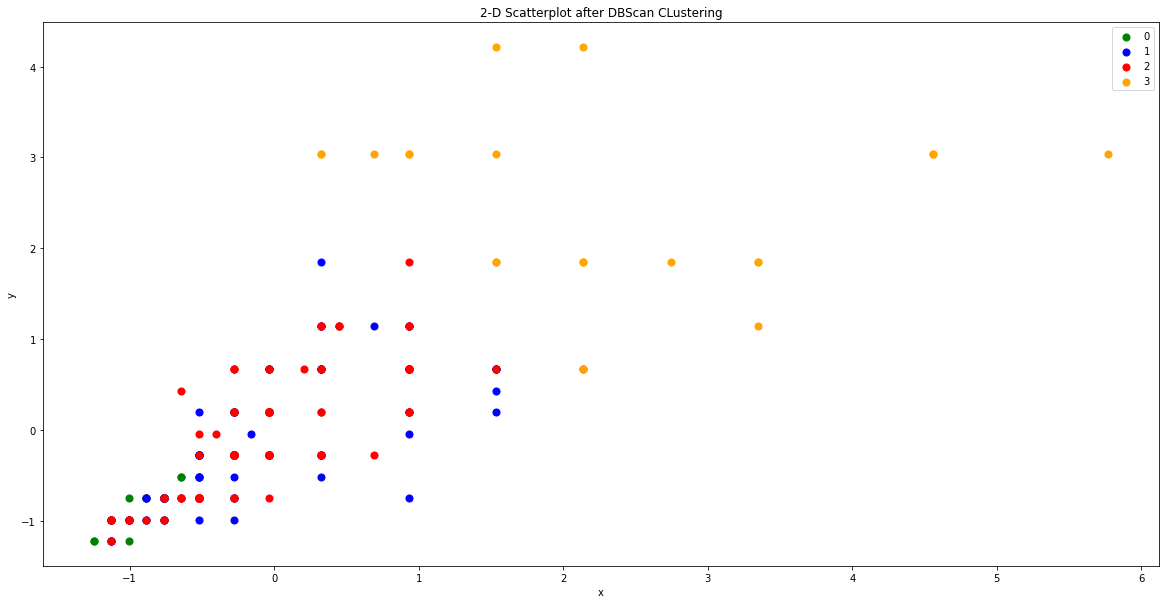

In [148]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "0")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "1")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'red', label = "2")
plt.scatter(x[y_clusters == -1,0],x[y_clusters == -1,1],s = 50, c = 'orange', label = "3")
# plt.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],s = 50, c = 'pink', label = "Less income and less spending")

# plt.scatter(centroids[:,0], centroids[:,1], s = 100, c = "black", label = "centroids")
plt.xlabel("x")
plt.ylabel("y")
plt.title('2-D Scatterplot after DBScan CLustering')
plt.legend()
plt.show()

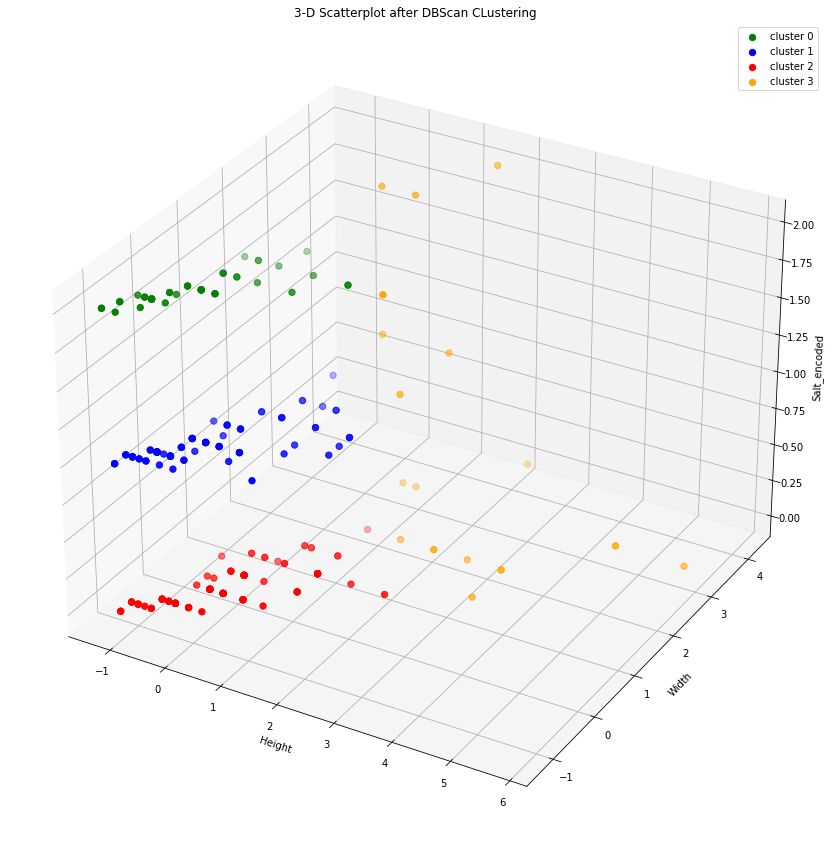

In [147]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'green', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'red', label = "cluster 2")
ax.scatter(x[y_clusters == -1,0],x[y_clusters == -1,1],x[y_clusters == -1,2], s = 40 , color = 'orange', label = "cluster 3")
# ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Salt_encoded')
plt.title('3-D Scatterplot after DBScan CLustering')
ax.legend()
plt.show()

In [144]:
print(min_samples)

6
